# Psychoinformatics - Week 13 (Exercises)
by boyonglin (r10945002@ntu.edu.tw)

## 1 進一步研究CNN (4 points)

### 1.1 為何ResNet50會判斷小女孩照片為ping-pong_bal, bubble, or Band_Aid? (4 points)

In [1]:
import numpy as np
import urllib.request
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

model = ResNet50(weights='imagenet')

urllib.request.urlretrieve('http://mil.psy.ntu.edu.tw/~tren/girl.jpg','girl.jpg')
img = image.load_img('girl.jpg', target_size=(224, 224)) # Or use cv2.resize to resize images
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

2023-12-04 21:20:03.257716: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-04 21:20:03.292521: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-04 21:20:03.292564: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-04 21:20:03.293637: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-04 21:20:03.299493: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-04 21:20:03.300107: I tensorflow/core/platform/cpu_feature_guard.cc:1

1/1 [==============================] - 1s 723ms/step
Predicted: [('n03942813', 'ping-pong_ball', 0.17623448), ('n09229709', 'bubble', 0.10817215), ('n02786058', 'Band_Aid', 0.089543946)]


傳統深度學習模型（例如 ResNet）在處理複雜環境下的訓練資料時，傾向於將所有可觀測到的特徵都納入學習與預測的過程。  
然而，這樣的方法可能導致模型將與標籤相關的特徵視為重要，卻未必能區分出與類別本質相關的特徵。  
在複雜環境中，傳統卷積網路難以將本質特徵和環境特徵有效區隔開來。  
這種模型傾向於同時考慮所有特徵進行預測，因此當環境發生變化時，模型所學到的相關性可能無法適用於因果推論。

### 1.2 請展示有別人pre-trained好的Keras model可以成功辨認girl.jpg為人臉 (4 points)

1/1 [==============================] - 0s 83ms/step


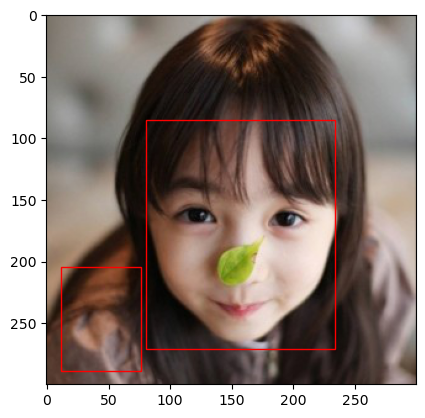

The image contains a human face.


In [30]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN
from PIL import Image

# Load image
img_path = 'girl.jpg'
pixels = plt.imread(img_path)

# Create the detector, using default weights
detector = MTCNN()

# Detect faces in the image
faces = detector.detect_faces(pixels)

# Plot the image with bounding boxes around the faces
plt.imshow(pixels)
ax = plt.gca()

for face in faces:
    x, y, width, height = face['box']
    rect = Rectangle((x, y), width, height, fill=False, color='red')
    ax.add_patch(rect)

plt.show()

# Check if any faces were detected
if len(faces) > 0:
    print("The image contains a human face.")
else:
    print("No human faces were detected in the image.")
